In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Problem Statement 1:
 ## A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.
## Dataset Information:
## The walmart.csv contains 6435 rows and 8 columns.
### Feature Name -  Description
### Store - Store number
### Date - Week of Sales
### Weekly_Sales -  Sales for the given store in that week
### Holiday_Flag -  If it is a holiday week
### Temperature -  Temperature on the day of the sale
### Fuel_Price -  Cost of the fuel in the region
### CPI -  Consumer Price Index
### Unemployment -  Unemployment Rate

# 1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various insights that can give them a clear perspective on the following:

In [28]:
df=pd.read_csv('Walmart DataSet.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [30]:
df['Date']=pd.to_datetime(df['Date'], format = 'mixed')

In [32]:
df['year']=df['Date'].dt.year
df['week']=df['Date'].dt.isocalendar().week
df['month']=df['Date'].dt.month

In [34]:
df.set_index('Date',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-05-02 to 2012-10-26
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   year          6435 non-null   int32  
 8   week          6435 non-null   UInt32 
 9   month         6435 non-null   int32  
dtypes: UInt32(1), float64(5), int32(2), int64(2)
memory usage: 483.9 KB


In [36]:
#check if any null values in data set
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
week            0
month           0
dtype: int64

In [38]:
# check if any duplicated rows are there in dataset
df.duplicated().sum()

0

Text(0.5, 1.0, 'Weekly_sales box plot')

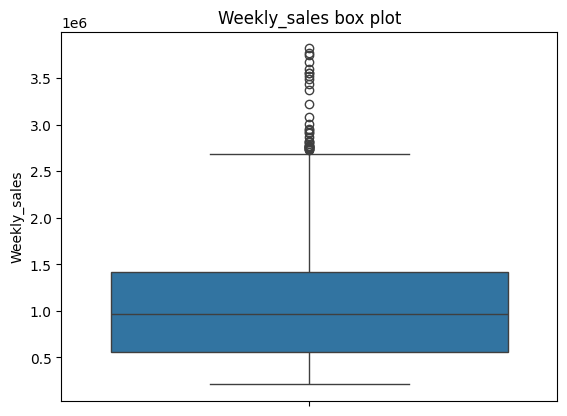

In [40]:
sns.boxplot(df['Weekly_Sales'])
plt.ylabel('Weekly_sales')
plt.title('Weekly_sales box plot')

Text(0.5, 1.0, 'Unemployment box plot')

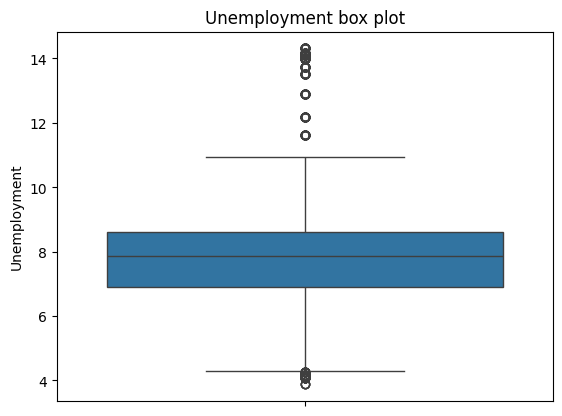

In [42]:
sns.boxplot(df['Unemployment'])
plt.ylabel('Unemployment')
plt.title('Unemployment box plot')

In [44]:
# Handling outlier
q1=df['Weekly_Sales'].quantile(0.25)
q3=df['Weekly_Sales'].quantile(0.75)
iqr=q3-q1
threshold=1.5*iqr
df=df[(df['Weekly_Sales']>q1-threshold)&(df['Weekly_Sales']<q3+threshold)]

In [46]:
q1=df['Unemployment'].quantile(0.25)
q3=df['Unemployment'].quantile(0.75)
iqr=q3-q1
threshold=1.5*iqr
df=df[(df['Unemployment']>q1-threshold)&(df['Unemployment']<q3+threshold)]

Text(0.5, 1.0, 'Weekly_sales box plot')

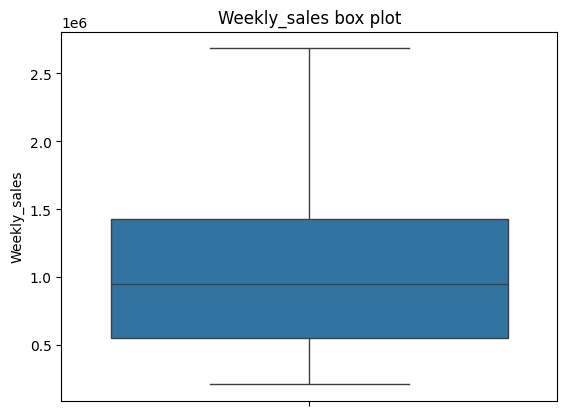

In [48]:
sns.boxplot(df['Weekly_Sales'])
plt.ylabel('Weekly_sales')
plt.title('Weekly_sales box plot')

Text(0.5, 1.0, 'Unemployment box plot')

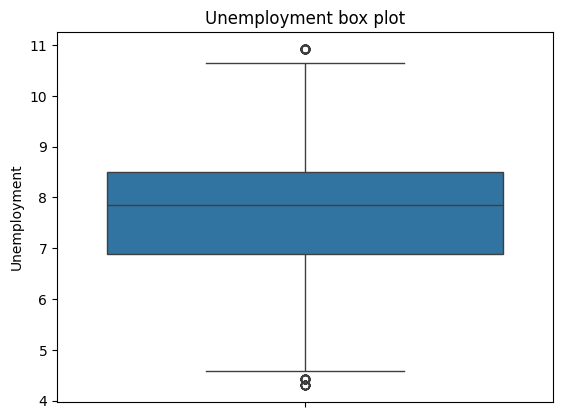

In [50]:
sns.boxplot(df['Unemployment'])
plt.ylabel('Unemployment')
plt.title('Unemployment box plot')

# EDA

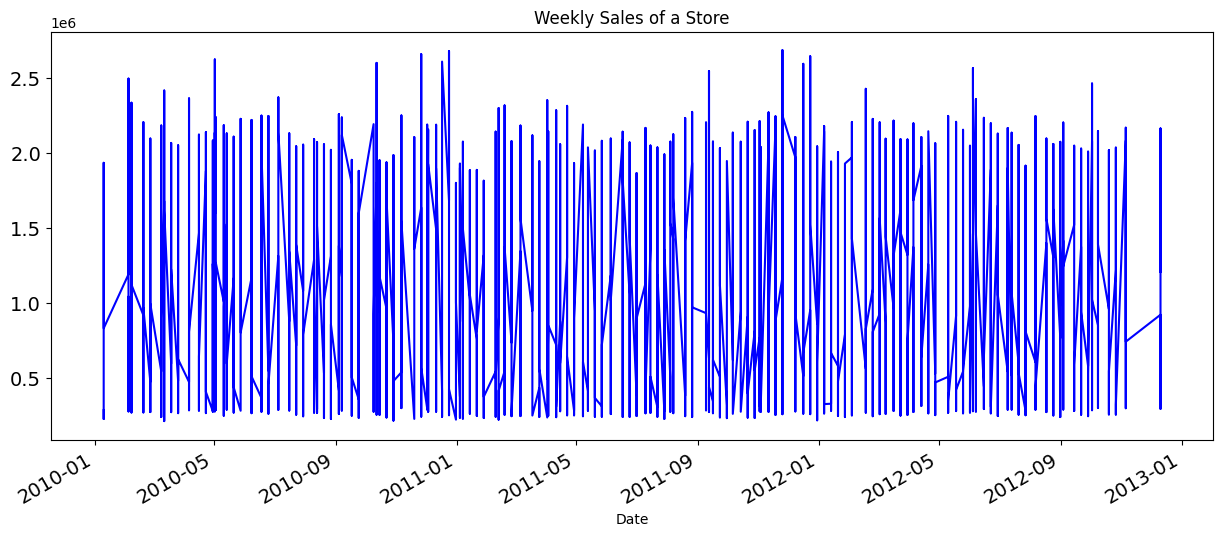

In [52]:
df.Weekly_Sales.plot(figsize=(15,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

## Store V/s Weekly Sales

In [68]:
df_store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

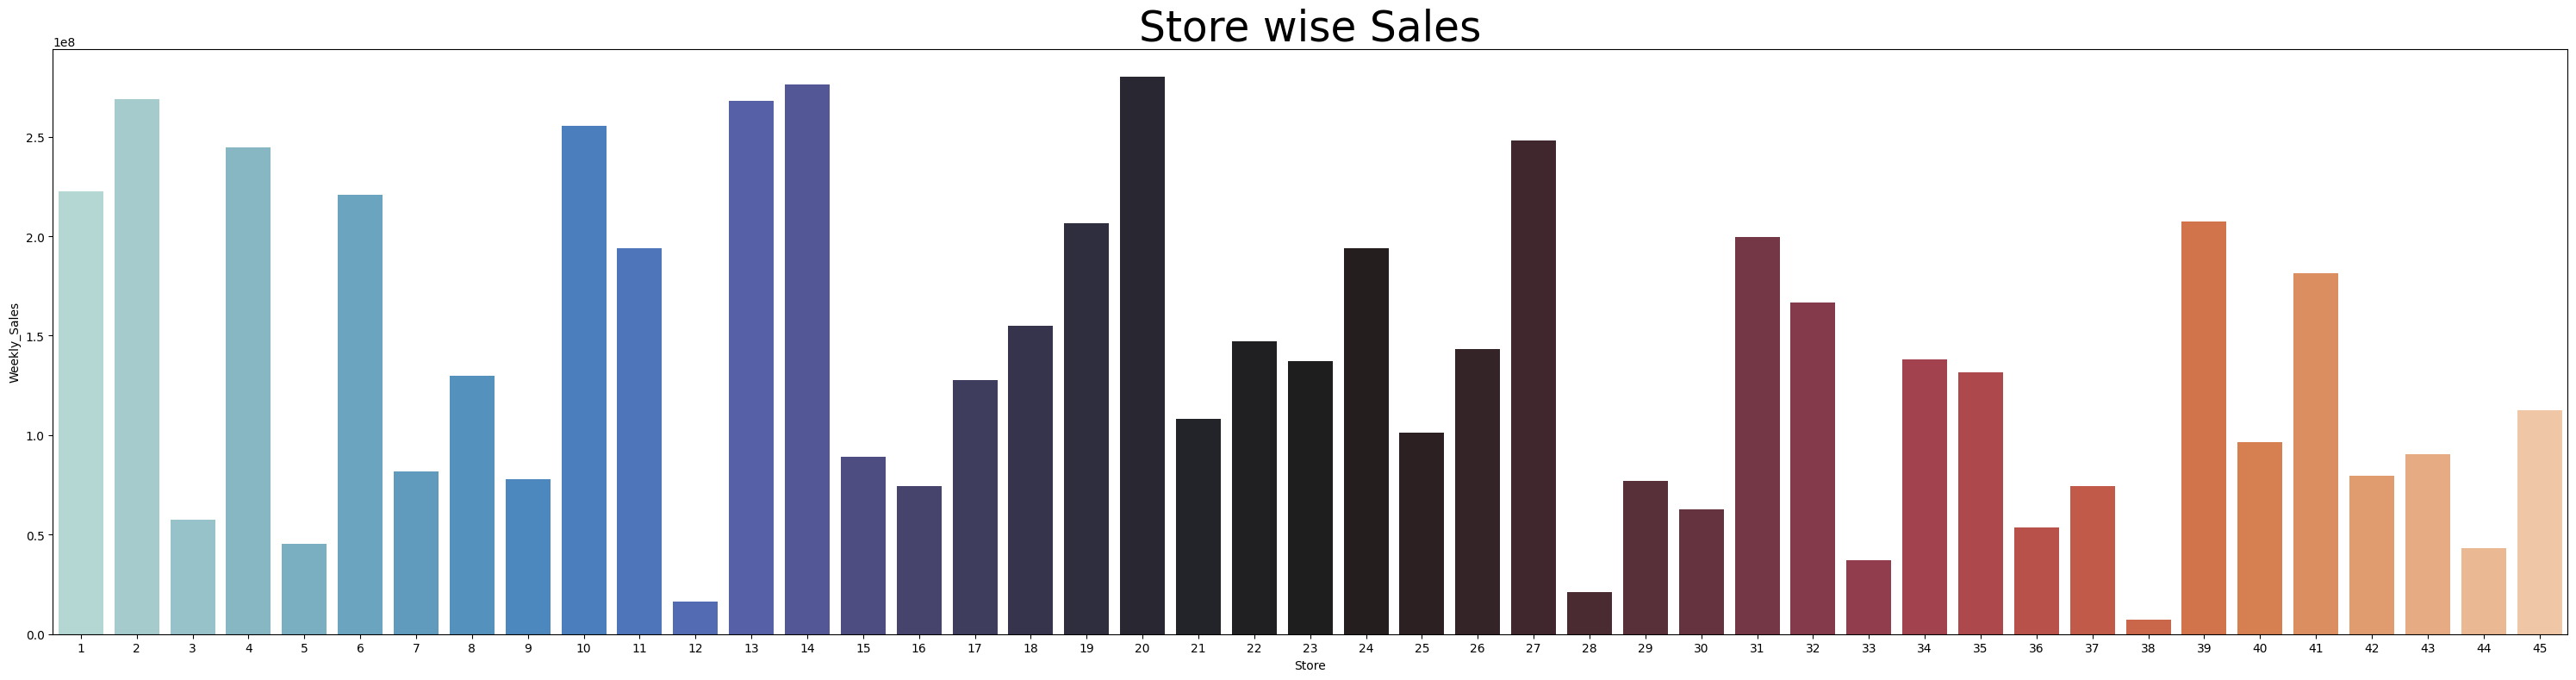

In [92]:
plt.figure(figsize=(30,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df_store_sales,palette='icefire')
plt.title('Store wise Sales',fontsize=35)
#plt.xlabel('Store',fontsize=25)
#plt.ylabel('Weekly_Sales',fontsize=25)
plt.tight_layout()
plt.show()

## Inference
- **Since we have 45 stores we cant take all the store sales. so we tried to plot top and botttom 10 stores saleswise.**

In [95]:
# Creating the dataframe which is having top 10 stores that can have highest weekly sales
top_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=False).head(10)
# Looking the dataframe
top_10_Sale_Store

,Store,Weekly_Sales
19,20,2.800237e+08
13,14,2.761276e+08
1,2,2.687221e+08
12,13,2.682025e+08
9,10,2.556789e+08
26,27,2.480387e+08
3,4,2.446487e+08
0,1,2.224028e+08
5,6,2.210286e+08
38,39,2.074455e+08


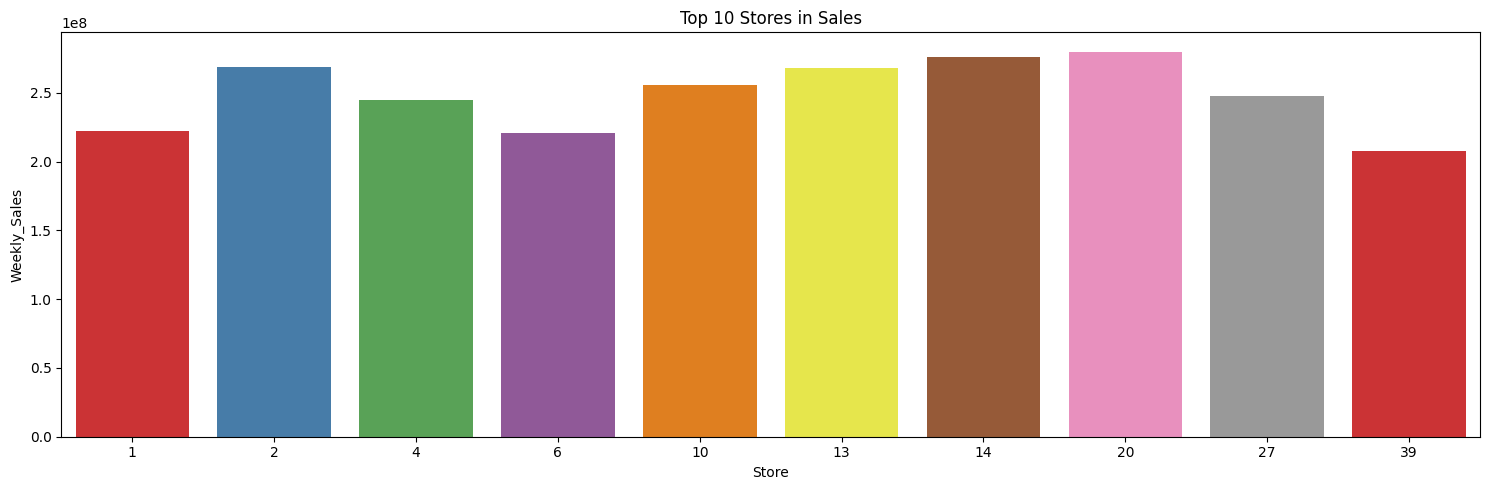

In [105]:
# plotting the top 10 stores
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store, palette = 'Set1') # creating the barplot
plt.title('Top 10 Stores in Sales') # putting title
plt.xlabel('Store') # assigening the X label as "Store"
plt.ylabel('Weekly_Sales') # assigening the Y label as "Weekly Sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show() # showing the plot

## Inference:
- **The Stores 4,20,14 is having the highest sales in top 10 stores segment**
- **The Stores 6,39 is having the Lowest sales in top 10 stores segment**

In [112]:
# Creating the dataframe which is having Bottom 10 stores that can have Lowest  weekly sales
Bottom_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=True).head(10)
Bottom_10_Sale_Store # Lokking at the data

,Store,Weekly_Sales
37,38,7347378.89
11,12,16386710.79
27,28,21106767.80
32,33,37160221.96
43,44,43293087.84
4,5,45475688.90
35,36,53412214.97
2,3,57586735.07
29,30,62716885.12
36,37,74202740.32


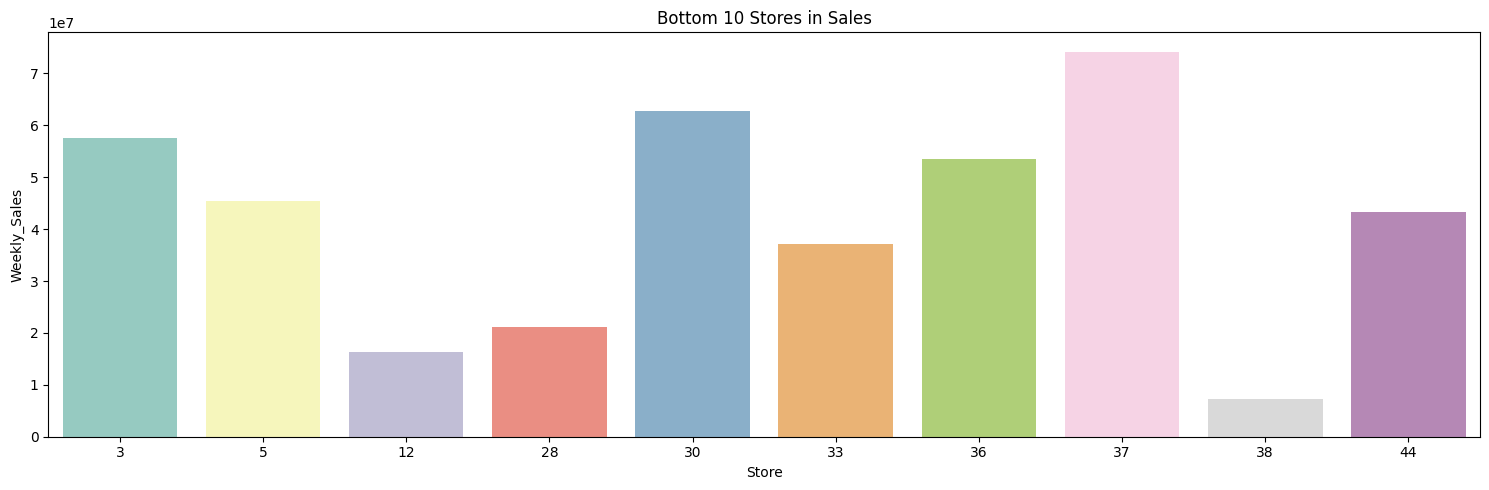

In [116]:
# plotting the Bottom 10 stores
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store, palette = 'Set3') # creating the barplot
plt.title('Bottom 10 Stores in Sales') # Set the titles
plt.xlabel('Store') # asigening the 'X' label as "Store"
plt.ylabel('Weekly_Sales') # asigening the 'Y' label as "Weekly sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show() # Showing the plots

## Inference:
- **The Stores 29,16,37 is having the highest sales in Bottom 10 stores segment**
- **The Stores 33,44 is having the highest sales in Bottom 10 stores segment**

### Date V/s Weekly Sales

In [120]:
# Creating the dataframe by grouping the date and summing all the weekly sales for the particular 'Date'
df_date_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_date_sales=df_date_sales.sort_values(by='Date',ascending=True) # Sorting the values in the dataframe to ascending
df_date_sales.head(5) # Looking at first five data points

,Date,Weekly_Sales
0,2010-01-10,39825602.62
1,2010-02-04,47601520.01
2,2010-02-07,46204385.56
3,2010-02-19,45363033.79
4,2010-02-26,41043557.90


In [122]:
df_date_sales.shape

(143, 2)

Text(0, 0.5, 'Sales')

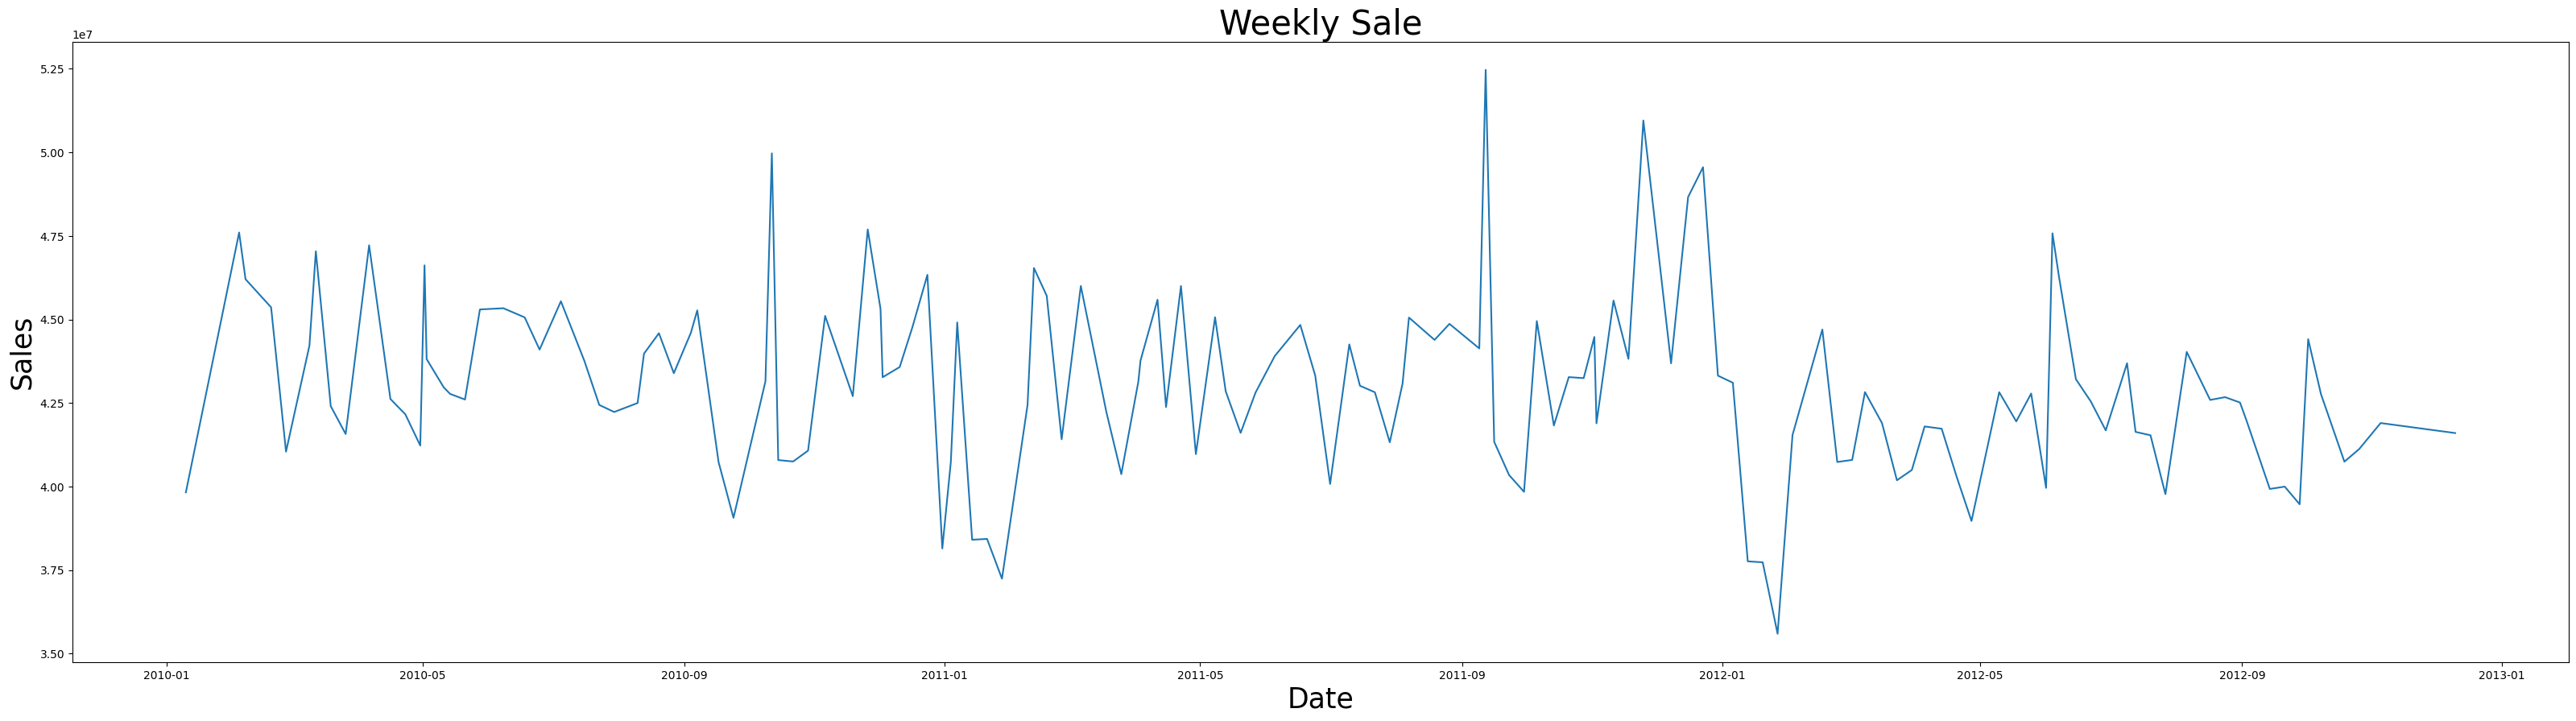

In [124]:
# Plotting the line chart for checking the trend of weekly sales
plt.figure(figsize=(40,10)) # Setting the size for plot
sns.lineplot(x='Date',y='Weekly_Sales',data=df_date_sales) # line plot
plt.title('Weekly Sale',fontsize=30) # setting titile
plt.xlabel('Date',fontsize=25) # xLabel as Date
plt.ylabel('Sales',fontsize=25) # Ylabel as Sales

## sales v/s Holidays

In [130]:
df['Holiday_Flag'].value_counts() # Checking the diffirent levels in Holiday column

Holiday_Flag
0    5511
1     409
Name: count, dtype: int64

In [132]:
# Creating a new datafram that contains holiday and weekly sales summation
df_Hf_Sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

In [134]:
df_Hf_Sales# Checking The Df

,Holiday_Flag,Weekly_Sales
0,0,5.706791e+09
1,1,4.452825e+08


<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

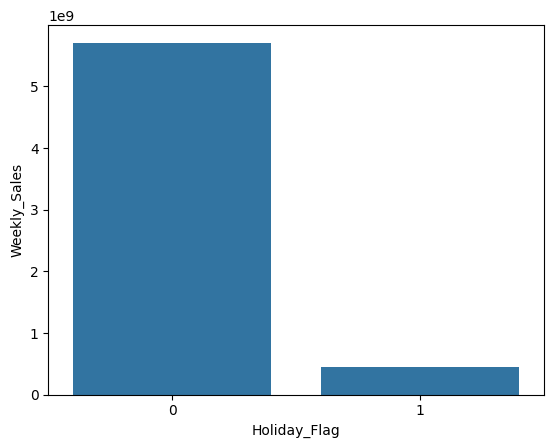

In [136]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=df_Hf_Sales) # Plotting the distribution

### Inference:
- **The Sales are High In Normal Days, it is Quite common because of that holidays are always low compared to working days**

## Temperature v/s sales

In [144]:
df['Temperature'].min() 

-2.06

In [142]:
df['Temperature'].max() # finding the Upper band of Tempeture

100.14

In [148]:
bins = [-5,25,50,75,100] # Creating bins to sort the tempeture values
labels = ['-5-25','26-50','51-75','76-100'] # Labels
df['Temp_Category']= pd.cut(df['Temperature'],bins=bins,labels=labels) # Inserting the temp values into the new column
df['Temp_Category'].value_counts() # Checking the diffirent columns in the temp category column

Temp_Category
51-75     2732
26-50     1528
76-100    1445
-5-25      213
Name: count, dtype: int64

<Axes: xlabel='Temp_Category', ylabel='Weekly_Sales'>

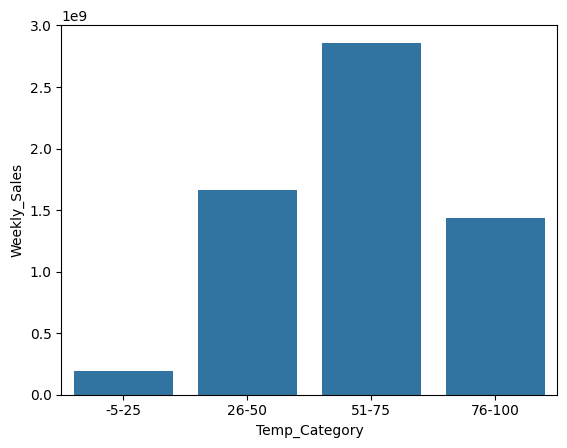

In [150]:
# finding sales pattren during these temp levels
df_temp_sales = df.groupby('Temp_Category')['Weekly_Sales'].sum().reset_index()
# Plotting the weekly sales distribution on barplot
sns.barplot(x='Temp_Category',y='Weekly_Sales',data=df_temp_sales)

### Inference:
- **Stores perform well in moderate temp that is 26-50**
- **Sales went peaks in Moderate to High temp that is 51-75**
- **Sales went down in Very High and Low temp that is 0-25 & 76-100**

## Fuel_Price V/s Sales

In [154]:
df['Fuel_Price'].min()

2.472

In [156]:
df['Fuel_Price'].max() # Checking the Upper price band for fuel

4.468

In [158]:
bins1 = [2,2.5,3,3.5,4,4.5] # Creating bins and labels to categorize the fuel prices
labels1 = ['2-2.5','2.6-3','3.1-3.5','3.6-4','4.1-4.5']
df['Fuel_Price_Cat']= pd.cut(df['Fuel_Price'],bins=bins1,labels=labels1) # creating new dataframe Fuel price category
df['Fuel_Price_Cat'].value_counts() # Checking the different levels in the fuel price category

Fuel_Price_Cat
3.6-4      2406
2.6-3      1834
3.1-3.5    1364
4.1-4.5     315
2-2.5         1
Name: count, dtype: int64

In [160]:
df_Fuel_Price_Sales = df.groupby('Fuel_Price_Cat')['Weekly_Sales'].sum().reset_index() # setting above values into pandas datframe
df_Fuel_Price_Sales

,Fuel_Price_Cat,Weekly_Sales
0,2-2.5,4.702810e+05
1,2.6-3,1.896083e+09
2,3.1-3.5,1.420033e+09
3,3.6-4,2.500333e+09
4,4.1-4.5,3.351540e+08


<Axes: xlabel='Fuel_Price_Cat', ylabel='Weekly_Sales'>

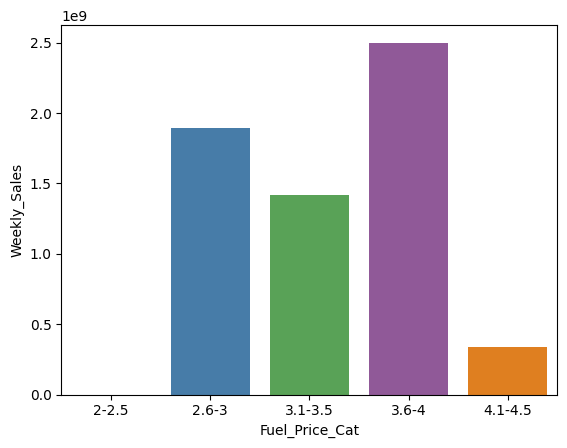

In [164]:
sns.barplot(x='Fuel_Price_Cat',y='Weekly_Sales',data=df_Fuel_Price_Sales, palette = 'Set1')

# Inference:
- **When the fuel prices are modereate the performance of stores are also moderatly high**
- **But the fuel Price went above the modereate level that is 3.5, and the sales are also went very High.. May be the Inflation and fear of increasing prices people are bought more grocery to metigate with inflation**
- **and when fuel price went even high the purchase power of people went down. may be the inflation and increasing in goods price**

## CPI v/s Sales

In [168]:
df['CPI'].min() # Checking the lower band of inflation

126.064

In [170]:
df['CPI'].max() # Checking the Upper band of inflation

227.2328068

In [172]:
bins2=[125,155,185,215,245] # Creating bins and labels for categorization of inflation rate
labels2=['125-155','156-185','186-215','216-245',]
df['CPI_cat']= pd.cut(df['CPI'],bins=bins2,labels=labels2) # Creating a new column called CPI Category
df['CPI_cat'].value_counts()

CPI_cat
125-155    2645
186-215    2000
216-245    1158
156-185     117
Name: count, dtype: int64

   CPI_cat  Weekly_Sales
0  125-155  2.865460e+09
1  156-185  1.656582e+08
2  186-215  2.001602e+09
3  216-245  1.119353e+09


<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

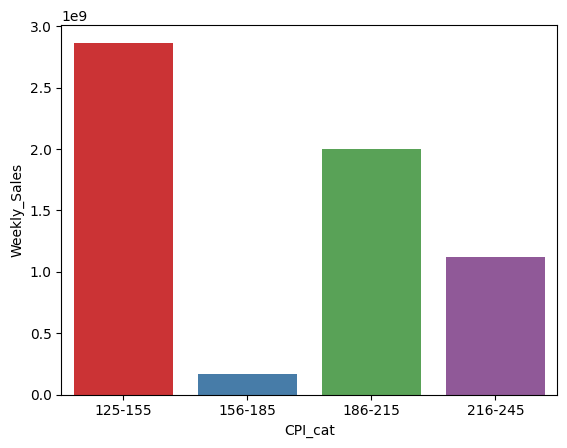

In [178]:
df_Cpi_Sales = df.groupby('CPI_cat')['Weekly_Sales'].sum().reset_index() # new DF
print(df_Cpi_Sales)
sns.barplot(x='CPI_cat',y='Weekly_Sales',data=df_Cpi_Sales, palette  = 'Set1')

### Inference:
- **when inflation is lower the performance of stores are high**
- **in intial time of inflation the sale were drop signficantly**
- **in third level when inflation is high the people may scared for future prices and bought more grocery for future needs also**
- **eventually when the inflation went peaks the sales are went down**

## Unemployment V/s Sales

In [182]:
df['Unemployment'].min() # Cheking the lower band of unemp rate

4.308

In [184]:
df['Unemployment'].max() # Cheking the Upper band of unemp rate

10.926

In [186]:
bins3=[4,6,8,10,12] # Creating the bins and labels to store the values
labels3=['4-6','6.1-8','8.1-10','10.1-12']
df['Unemployment_Rate_Cat']= pd.cut(df['Unemployment'],bins=bins3,labels=labels3) # creating the new column in the dataframe
df['Unemployment_Rate_Cat'].value_counts() #Checking the diffirent levels in the UnEmp Column

Unemployment_Rate_Cat
6.1-8      2774
8.1-10     2380
4-6         515
10.1-12     251
Name: count, dtype: int64

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

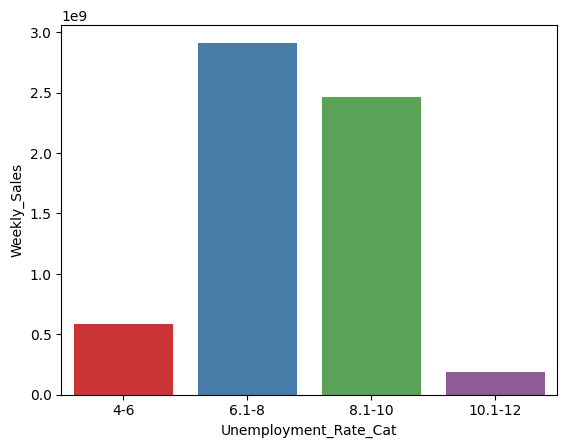

In [194]:
df_Un_Emp_Sales = df.groupby('Unemployment_Rate_Cat')['Weekly_Sales'].sum().reset_index() # Creating separte dataframe for the sales and UnEmp rate
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Un_Emp_Sales, palette = 'Set1')

# Stastical Analysis

In [197]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

### Correlation Analysis

In [202]:
df_Encode = df[['Temp_Category','Fuel_Price_Cat','CPI_cat','Unemployment_Rate_Cat']].copy()

In [206]:
df_Encode['Temp_Category']=Le.fit_transform(df['Temp_Category'])
df_Encode['Fuel_Price_Cat']=Le.fit_transform(df['Fuel_Price_Cat'])
df_Encode['CPI_cat']=Le.fit_transform(df['CPI_cat'])
df_Encode['Unemployment_Rate_Cat']=Le.fit_transform(df['Unemployment_Rate_Cat'])
df_Encode['Weekly_Sales']=Le.fit_transform(df['Weekly_Sales'])

In [208]:
corr_df = df_Encode.corr()

<Axes: >

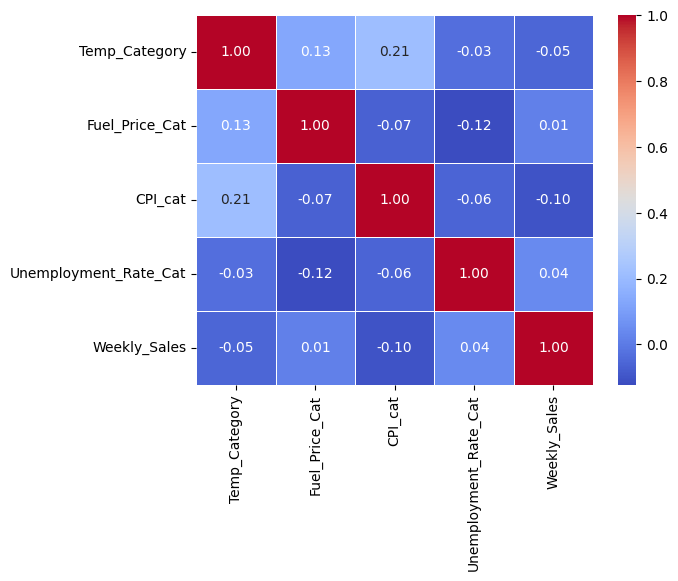

In [210]:
sns.heatmap(corr_df,annot=True,cmap='coolwarm',fmt=".2f",linewidths=.5)

In [215]:
#Dropping Repating columns
df.drop('Temp_Category',axis=1,inplace=True)
df.drop('Fuel_Price_Cat',axis=1,inplace=True)
df.drop('CPI_cat',axis=1,inplace=True)
df.drop('Unemployment_Rate_Cat',axis=1,inplace=True)

In [219]:
df.head(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week,month
Date,,,,,,,,,,
2010-05-02,1,1643690.9,0,42.31,2.572,211.096358,8.106,2010,17,5


# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

Text(0.5, 1.0, 'correlation between unemploment and sales for different stores')

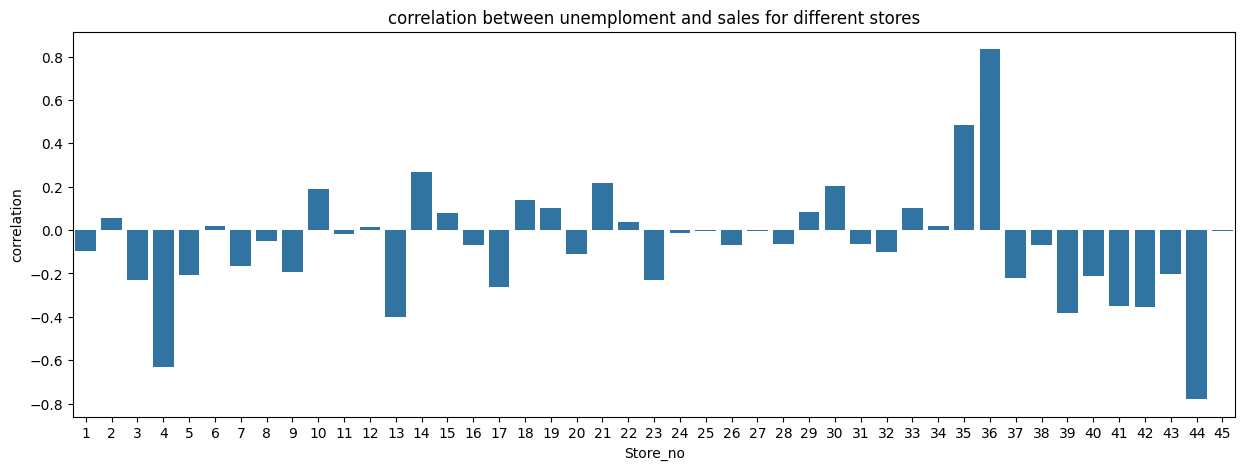

In [62]:
lst1=[]
for i in df.Store.unique():
    lst1.append(df[df['Store']==i][['Weekly_Sales','Unemployment']].corr().iloc[0,1])
se=pd.Series(lst1,index=df.Store.unique())
plt.figure(figsize=(15,5))
sns.barplot(x=se.index,y=se.values)
plt.xlabel('Store_no')
plt.ylabel('correlation')
plt.title('correlation between unemploment and sales for different stores')


In [64]:
# consider magnitude of corr values
for i in range(1,len(se)+1):
    if se[i]<0:
        se[i]=se[i]*(-1)
# top 10 stores sales affected by unemployment
corr_df=pd.DataFrame(se,columns=['correlation'])
corr_df.index.name='Store_no'
sorted_corr_df=corr_df.sort_values(by='correlation',ascending=False).iloc[:10,:]
print('List of top 10 affected stores: ',sorted_corr_df.index)
print(sorted_corr_df)

List of top 10 affected stores:  Index([36, 44, 4, 35, 13, 39, 42, 41, 14, 17], dtype='int64', name='Store_no')
          correlation
Store_no             
36           0.833734
44           0.780076
4            0.633422
35           0.483865
13           0.400254
39           0.384681
42           0.356355
41           0.350630
14           0.269510
17           0.263600


###  For some stores there is a correlation between unemployment and weekly_sales either positive or negative correlation.mostly affected stores are listed below([36, 38, 44, 4, 35, 13, 39, 42, 41, 14])

# b. If the weekly sales show a seasonal trend, when and what could be the reason?

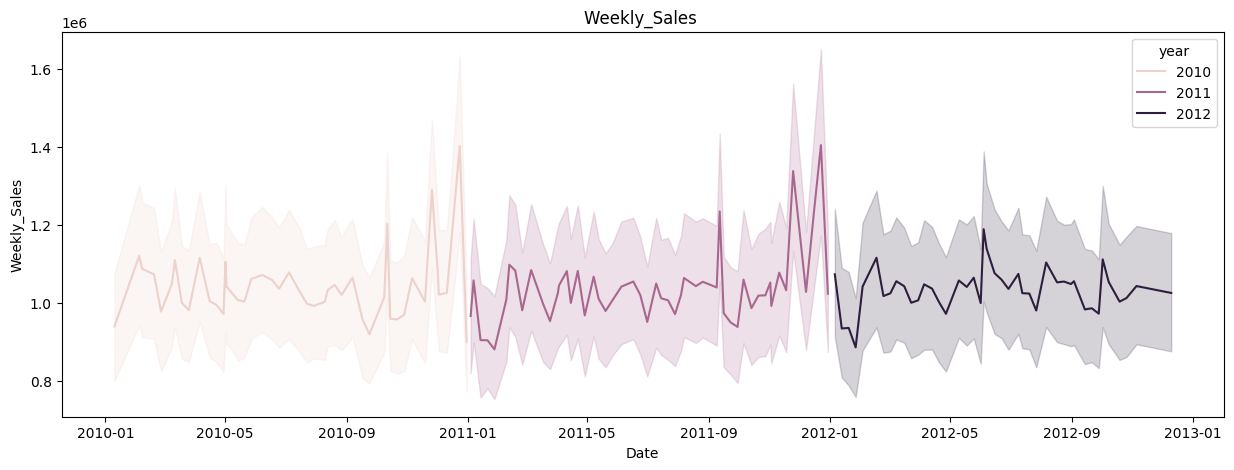

In [69]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df.index,y=df['Weekly_Sales'],hue=df['year'])
plt.title('Weekly_Sales ')
plt.show()

### 1.B. Seasonality is present in the data set in year end. Holiday flag also shows some affect on sales

##  impact of holidays on weekly sales

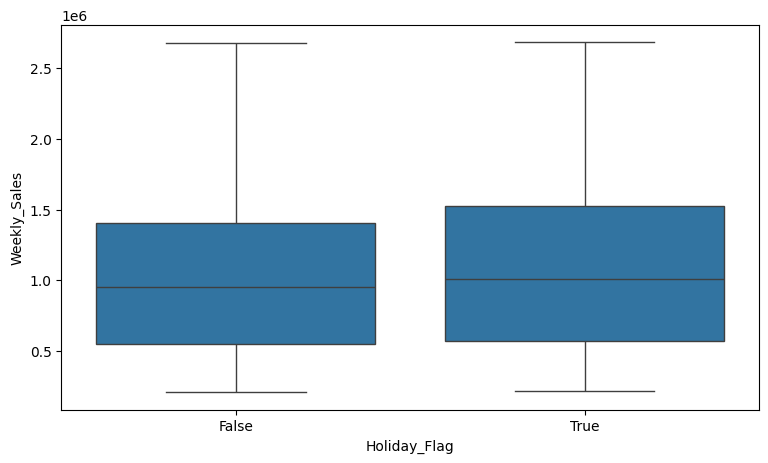

In [72]:
plt.figure(figsize = (9,5))
sns.boxplot(x = 'Holiday_Flag', y ='Weekly_Sales', data = df)
# Mapping 0 to False and 1 to True in x-axis labels
plt.xticks([0, 1], ['False', 'True'])
plt.show()

## Lets visualize the average weekly_sales for all stores and any year

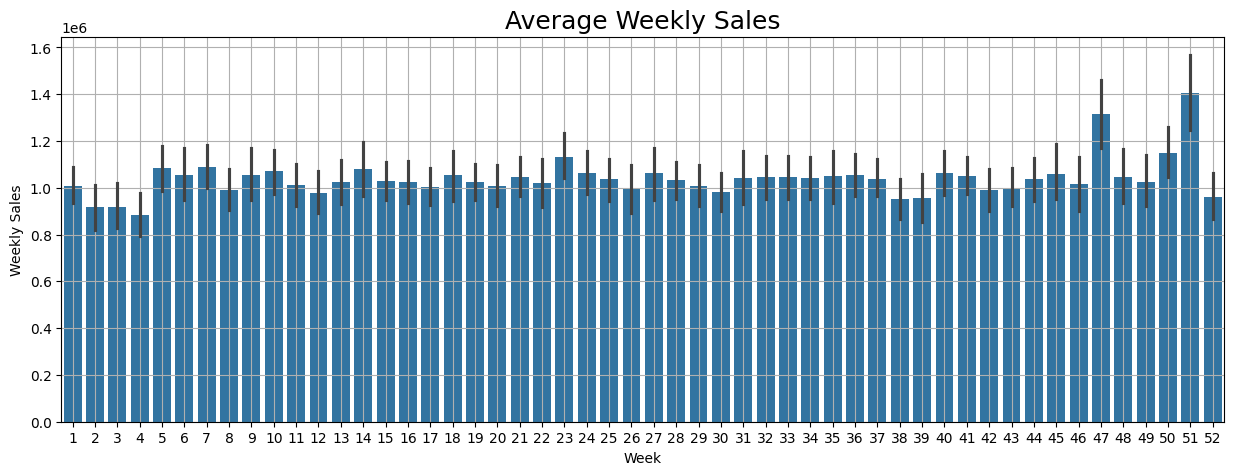

In [74]:
plt.figure(figsize=(15,5))
sns.barplot(x='week',y='Weekly_Sales',data=df)
plt.title('Average Weekly Sales', fontsize=18)
plt.ylabel('Weekly Sales')
plt.xlabel('Week')
plt.grid()
plt.show()

# c. Does temperature affect the weekly sales in any manner?

## The correlation between temperature and sales for different stores

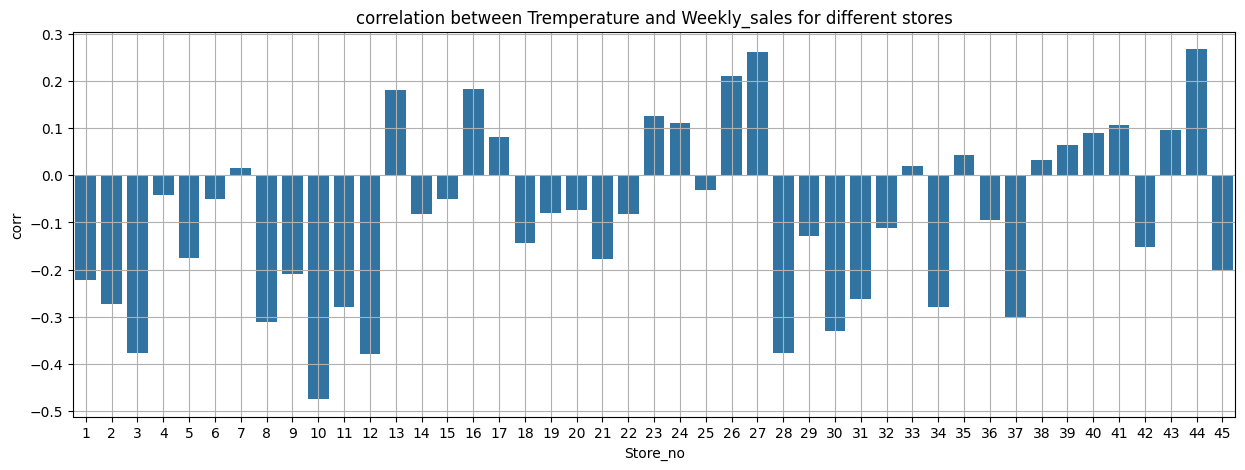

In [82]:
lst1=[]
for i in df.Store.unique():
    lst1.append(df[df['Store']==i][['Weekly_Sales','Temperature']].corr().iloc[0,1])
se=pd.Series(lst1,index=df.Store.unique())
plt.figure(figsize=(15,5))
sns.barplot(x=se.index,y=se.values)
plt.xlabel('Store_no')
plt.ylabel('corr')
plt.title('correlation between Tremperature and Weekly_sales for different stores')
plt.grid()
plt.show()

## As we see the stores 3,10,12,29,44...  has some correlation

##  lets do scatter plot for them

Text(0.5, 1.0, 'Store_44')

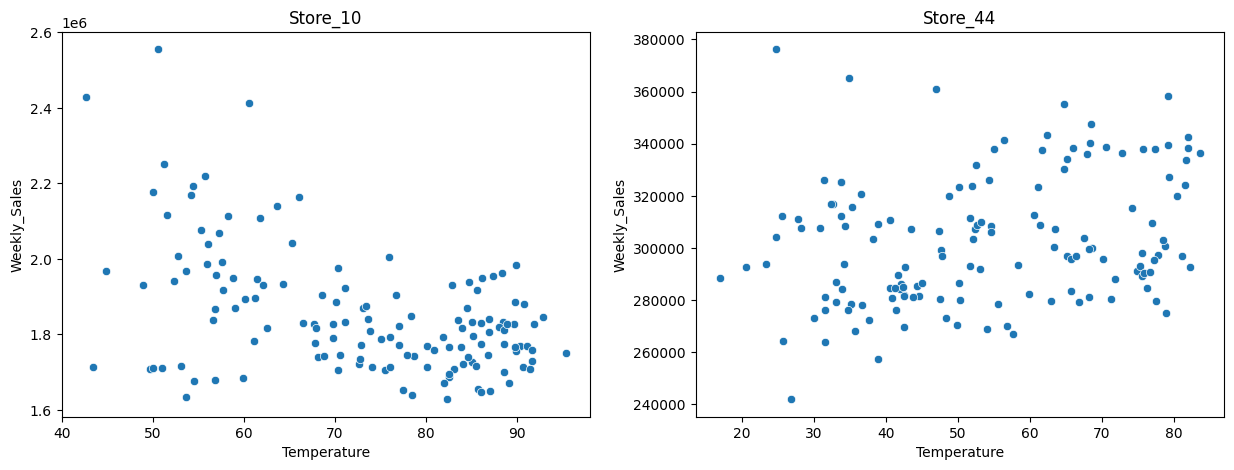

In [88]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_store_10=df[df['Store']==10]
sns.scatterplot(x=df_store_10['Temperature'],y=df_store_10['Weekly_Sales'])
plt.title('Store_10')

plt.subplot(1,2,2)
df_store_44=df[df['Store']==44]
sns.scatterplot(x=df_store_44['Temperature'],y=df_store_44['Weekly_Sales'])
plt.title('Store_44')

# d. How is the Consumer Price index affecting the weekly sales of various stores?

In [91]:
df.head(1)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week,month
Date,,,,,,,,,,
2010-05-02,1,1643690.9,0,42.31,2.572,211.096358,8.106,2010,17,5


## find the correlation between CPI and sales for different stores

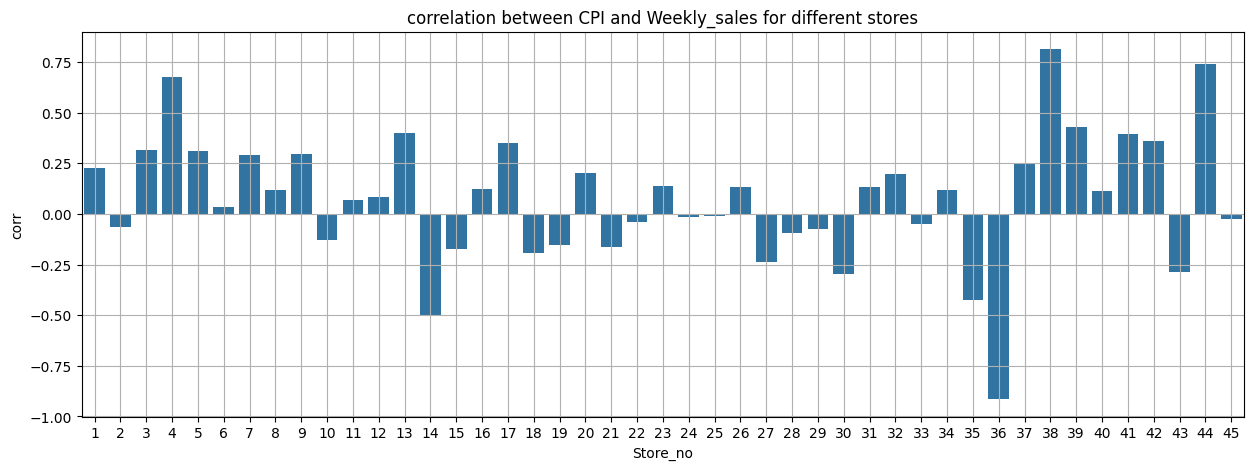

In [93]:
lst1=[]
for i in df.Store.unique():
    lst1.append(df[df['Store']==i][['Weekly_Sales','CPI']].corr().iloc[0,1])
se=pd.Series(lst1,index=df.Store.unique())
plt.figure(figsize=(15,5))
sns.barplot(x=se.index,y=se.values)
plt.xlabel('Store_no')
plt.ylabel('corr')
plt.title('correlation between CPI and Weekly_sales for different stores')
plt.grid()
plt.show()

##  as we see the stores 35,38...  has some correlation lets do scatter plot for them

Text(0.5, 1.0, 'Store_38')

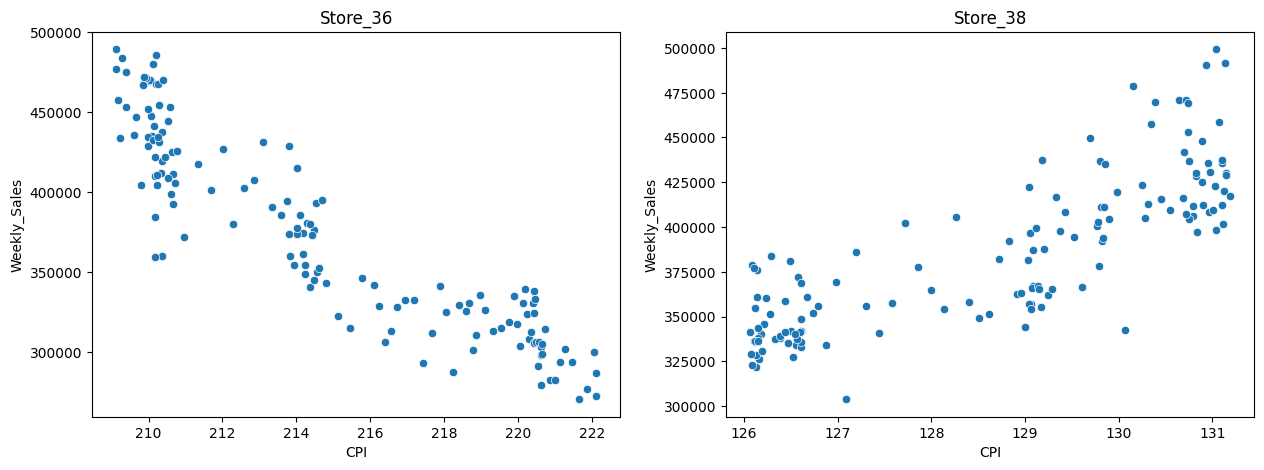

In [101]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df_store_36=df[df['Store']==36]
sns.scatterplot(x=df_store_36['CPI'],y=df_store_36['Weekly_Sales'])
plt.title('Store_36')

plt.subplot(1,2,2)
df_store_38=df[df['Store']==38]
sns.scatterplot(x=df_store_38['CPI'],y=df_store_38['Weekly_Sales'])
plt.title('Store_38')

# e. Top performing stores according to the historical data.

## Bar plot on sales for all stores

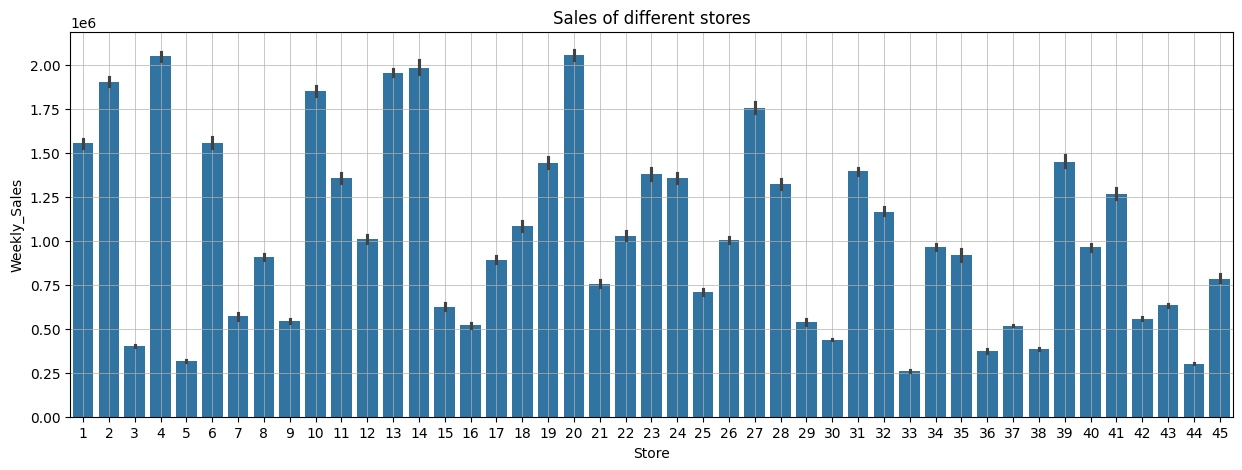

In [107]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=df)
plt.title('Sales of different stores')
plt.grid(linewidth=0.5)

## Top 10 best performed stores

In [111]:
ser=df.groupby(by='Store')['Weekly_Sales'].mean()
sorted_ser=ser.sort_values(ascending=False)
print('Top 10 best performed stores:')
print(list(sorted_ser.index[:10]))

Top 10 best performed stores:
[20, 4, 14, 13, 2, 10, 27, 6, 1, 39]


# f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [114]:
ser=df.groupby(by='Store')['Weekly_Sales'].mean()
sorted_ser=ser.sort_values(ascending=True)
print('List of 10 Worst performed stores:')
print(list(sorted_ser.index[:10]))

List of 10 Worst performed stores:
[33, 44, 5, 36, 38, 3, 30, 37, 16, 29]


## Significant is the difference between the highest and lowest performing stores.

In [117]:
highest_sale_of_a_store=df.groupby(by='Store')['Weekly_Sales'].mean().sort_values(ascending=False).values[0]
lowest_sale_of_a_store=df.groupby(by='Store')['Weekly_Sales'].mean().sort_values(ascending=True).values[0]

print('highest_sale_of_a_store:',np.round(highest_sale_of_a_store,2))
print('lowest_sale_of_a_store:',np.round(lowest_sale_of_a_store,2))
print('')
print('the difference between the highest and lowest performing stores: ')
print(np.round(highest_sale_of_a_store-lowest_sale_of_a_store,2))

highest_sale_of_a_store: 2058998.05
lowest_sale_of_a_store: 259861.69

the difference between the highest and lowest performing stores: 
1799136.36


# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [130]:
#Import libraries for Time series
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
import pmdarima as pmd

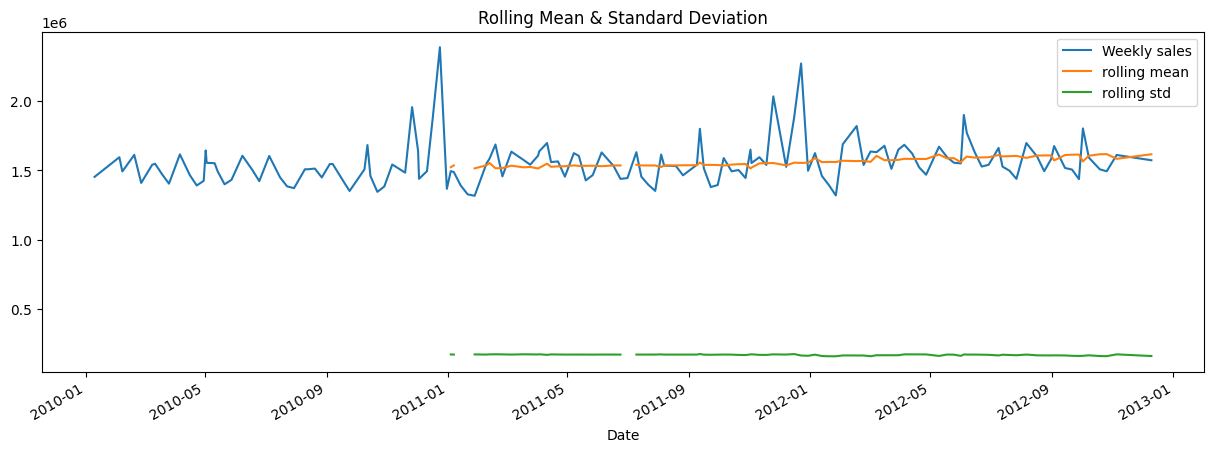

In [132]:
# for store 1
plt.figure(figsize=(15,5))
store_01=df[df['Store']==1]['Weekly_Sales']
mean=store_01.rolling(52).mean()
std=store_01.rolling(52).std()
store_01=store_01.sort_index()
store_01.plot()
mean.plot()
std.plot()
plt.legend(labels=['Weekly sales','rolling mean','rolling std'])
plt.title('Rolling Mean & Standard Deviation')
store_01=store_01.dropna()

## Check the stationarity of the data

In [135]:
results=adfuller(store_01)
print("P-Values: ",results[1])

P-Values:  1.9818882304155613e-16


## Using Auto arima for P,d,q parameters

In [138]:
model=pmd.auto_arima(store_01)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1912.789
Date:                Fri, 02 May 2025   AIC                           3831.578
Time:                        19:59:27   BIC                           3840.446
Sample:                             0   HQIC                          3835.182
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5923      0.039    -15.200      0.000      -0.669      -0.516
ma.L2         -0.3195      0.050     -6.387      0.000      -0.418      -0.221
sigma2      2.808e+10   4.59e-13   6.12e+22      0.000    2.81e+10    2.81e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                73.91
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             1.12
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.53e+38. Standard errors may be unstable.
"""

In [185]:
model.order

(0, 1, 2)

C:\Users\marup\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\marup\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\marup\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Text(0.5, 1.0, 'Weekly sales forecast for store 1')

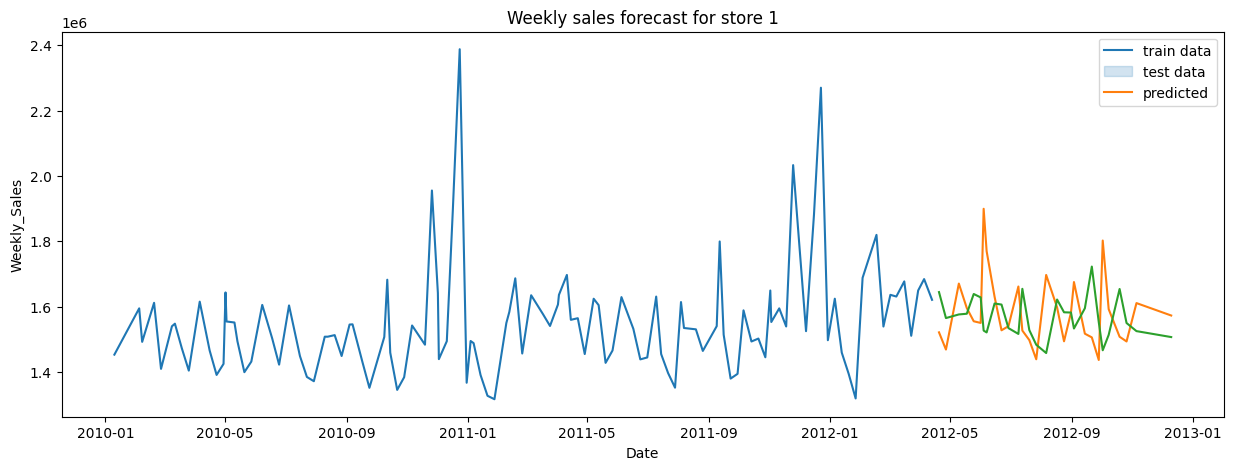

In [141]:
#forecasting the future sales with sarimax model with seasinality as 52
train=store_01[:int(0.8*len(store_01))]
test=store_01[int(0.8*len(store_01)):]
model=SARIMAX(train,order=(0,1,2),seasonal_order=(0,1,2,52))
model_fit=model.fit()
pre=model_fit.predict(start=int(0.8*len(store_01)),end=len(store_01)-1)
pre.index=test.index

plt.figure(figsize=(15,5))
sns.lineplot(train)
sns.lineplot(test)
sns.lineplot(pre)
plt.legend(loc='best',labels=['train data','test data','predicted'])
plt.title('Weekly sales forecast for store 1')

**_______________________________________________________________________________________________________________________**
# Store Wise Predictions
## Store 1 Sales Forecast

In [230]:
# Creating a new data frame for store 1 sales forecast
store1_sales = df[df['Store']==1].groupby('Date')['Weekly_Sales'].sum().reset_index()
store1_sales

,Date,Weekly_Sales
0,2010-01-10,1453329.50
1,2010-02-04,1594968.28
2,2010-02-07,1492418.14
3,2010-02-19,1611968.17
4,2010-02-26,1409727.59
...,...,...
138,2012-10-08,1592409.97
139,2012-10-19,1508068.77
140,2012-10-26,1493659.74
141,2012-11-05,1611096.05


In [234]:
store1_sales['Date'].min()

Timestamp('2010-01-10 00:00:00')

In [236]:
store1_sales['Date'].max()

Timestamp('2012-12-10 00:00:00')

In [240]:
dates=pd.date_range(start=store1_sales['Date'].min(),end=store1_sales['Date'].max(),freq='W')#ME - month end, MS= month start
dates

DatetimeIndex(['2010-01-10', '2010-01-17', '2010-01-24', '2010-01-31',
               '2010-02-07', '2010-02-14', '2010-02-21', '2010-02-28',
               '2010-03-07', '2010-03-14',
               ...
               '2012-10-07', '2012-10-14', '2012-10-21', '2012-10-28',
               '2012-11-04', '2012-11-11', '2012-11-18', '2012-11-25',
               '2012-12-02', '2012-12-09'],
              dtype='datetime64[ns]', length=153, freq='W-SUN')

In [242]:
missing_dates=dates.difference(store1_sales['Date'])
missing_dates

DatetimeIndex(['2010-01-17', '2010-01-24', '2010-01-31', '2010-02-14',
               '2010-02-21', '2010-02-28', '2010-03-07', '2010-03-14',
               '2010-03-21', '2010-03-28',
               ...
               '2012-10-07', '2012-10-14', '2012-10-21', '2012-10-28',
               '2012-11-04', '2012-11-11', '2012-11-18', '2012-11-25',
               '2012-12-02', '2012-12-09'],
              dtype='datetime64[ns]', length=144, freq=None)

In [244]:
store1_sales = store1_sales.set_index('Date')

In [246]:
#adfuller test
from statsmodels.tsa.stattools import adfuller#augmented dickey fuller test

In [248]:
result=adfuller(store1_sales['Weekly_Sales'])
result[1]

1.9818882304155613e-16

In [250]:
null_hypothesis= 'data is not stationary'
#
alternative_hypothesis='data is stationary'
if result[1]<0.05:
  print(alternative_hypothesis)#reject H0,accept H1
else:
  print(null_hypothesis)

data is stationary


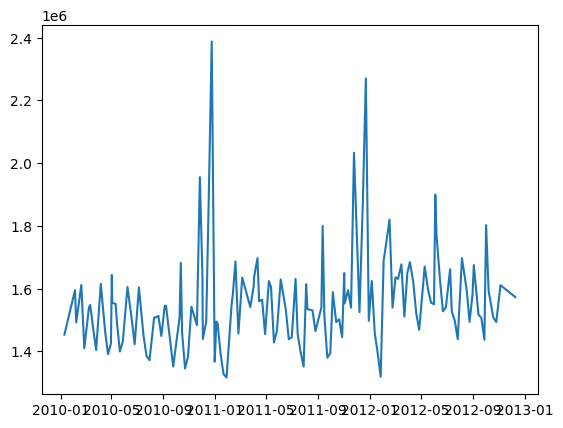

In [252]:
plt.plot(store1_sales)

In [254]:
#seasonal decompose method:
from statsmodels.tsa.seasonal import seasonal_decompose

In [258]:
store1_sales

,Weekly_Sales
Date,
2010-01-10,1453329.50
2010-02-04,1594968.28
2010-02-07,1492418.14
2010-02-19,1611968.17
2010-02-26,1409727.59
...,...
2012-10-08,1592409.97
2012-10-19,1508068.77
2012-10-26,1493659.74


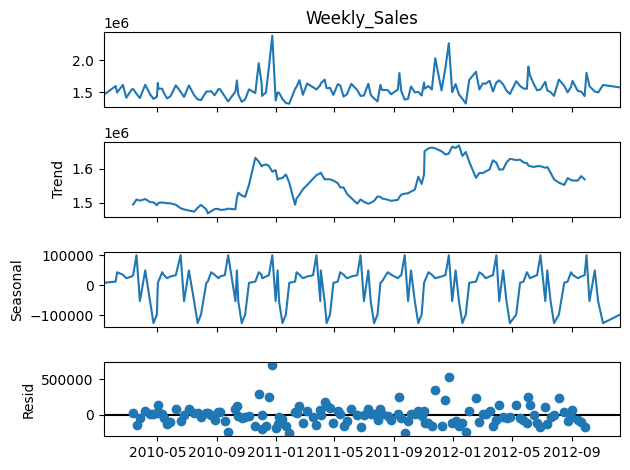

In [262]:
decompose=seasonal_decompose(store1_sales['Weekly_Sales'],model='additive', period = 13)
decompose.plot()
plt.show()

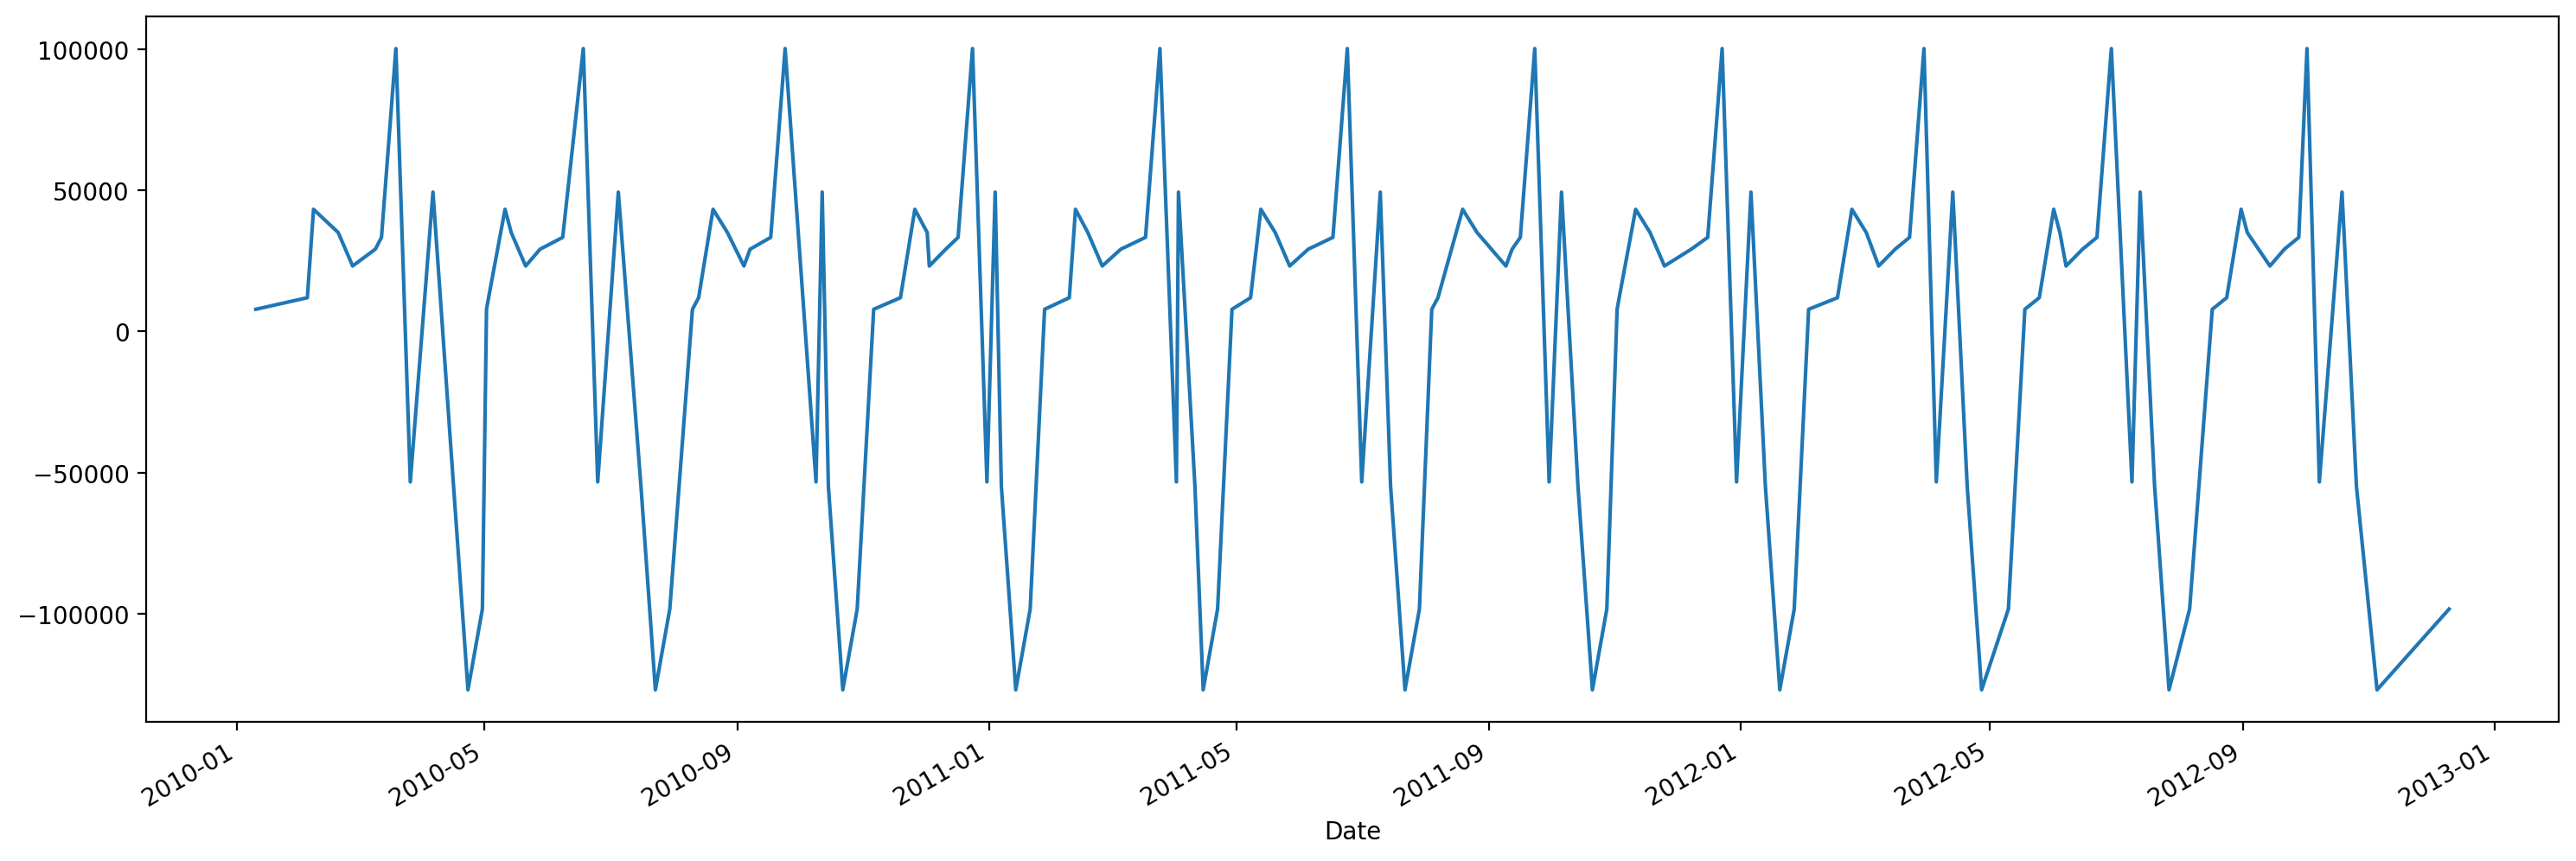

In [270]:
d_seasonal=decompose.seasonal
plt.figure(figsize=(18,6),dpi=200)
d_seasonal.plot()
plt.show()

In [264]:
!pip install pmdarima

In [266]:
from pmdarima import auto_arima

In [268]:
import pmdarima as pm

In [297]:
model=auto_arima(store1_sales)

In [298]:
model.order#(p,d,q)

(0, 1, 2)

In [305]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [307]:
s_model=SARIMAX(store1_sales,order=(0,1,2),seasonal_order=(0,1,2,52))

C:\Users\marup\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\marup\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [309]:
s_model=s_model.fit()

In [310]:
s_forecasting=s_model.forecast(steps=12)

C:\Users\marup\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [311]:
end_date_actual_data = '2012-12-10' # here i need to find my dataset end date. so that i can continue from there to next 12 weeks

# Generate dates for the forecasted period
# with the help of datetime function iam creating a time span of 12 weeks
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(s_forecasting))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [312]:
forecast_dates

DatetimeIndex(['2012-12-16', '2012-12-23', '2012-12-30', '2013-01-06',
               '2013-01-13', '2013-01-20', '2013-01-27', '2013-02-03',
               '2013-02-10', '2013-02-17', '2013-02-24', '2013-03-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [313]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': s_forecasting})

In [319]:
forecast_df.set_index('Date',inplace=True)

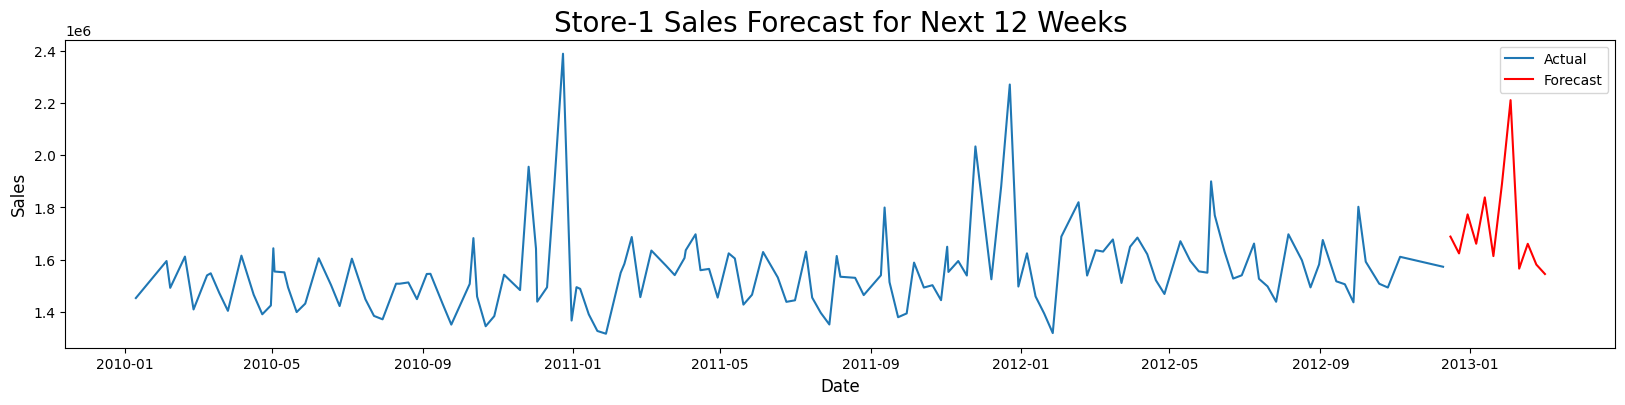

In [321]:
plt.figure(figsize=(20, 4))
plt.plot(store1_sales, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-1 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [323]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,week,month
Date,,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,17,5
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,48,12
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,7,2
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,8,2
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,18,5


In [325]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)